In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import pickle
import pandas as pd

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [0]:
x_train, y_train = train_data ['features'], train_data ['labels']
x_valid, y_valid = valid_data ['features'], valid_data ['labels']
x_test,  y_test  = test_data  ['features'], test_data  ['labels']

In [0]:
print(x_train.shape) #yaklasik 35000 resim var 32x32 lik ve 3 katmanli(RGB)
print(y_train.shape) #label sayisi
print(x_valid.shape) #yaklasik  4500 resim var 32x32 lik ve 3 katmanli(RGB)
print(x_test.shape)  #yaklasik 12600 resim var 32x32 lik ve 3 katmanli(RGB)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert x_train.shape[0]  == y_train.shape[0], "Resim sayisi, label sayisina esit degil" 
assert x_valid.shape[0]  == y_valid.shape[0], "Resim sayisi, label sayisina esit degil" 
assert x_test.shape [0]  == y_test.shape [0], "Resim sayisi, label sayisina esit degil"
assert x_train.shape[1:] == (32, 32, 3)     , "Resim boyutlari 32 x 32 x 3 degil" 
assert x_valid.shape[1:] == (32, 32, 3)     , "Resim boyutlari 32 x 32 x 3 degil"
assert x_test.shape [1:] == (32, 32, 3)     , "Resim boyutlari 32 x 32 x 3 degil"

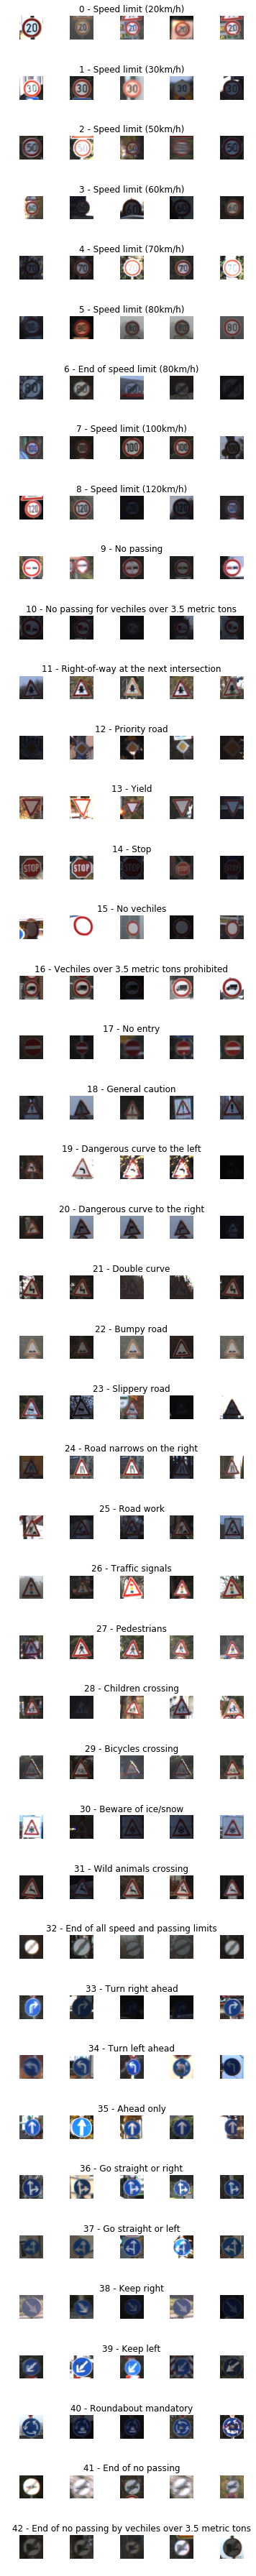

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = x_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


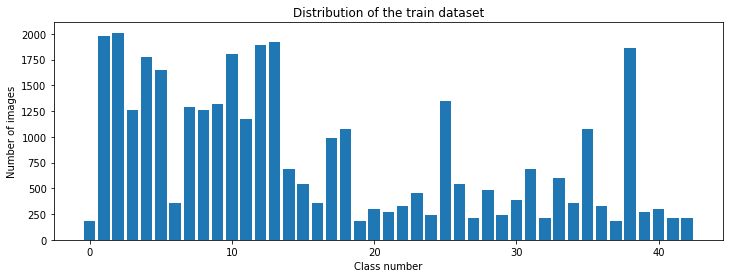

In [0]:
#train verilerinin class numaralarına göre dagilimlari
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


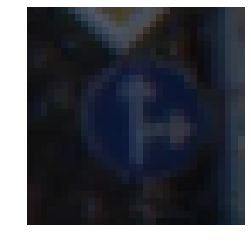

In [0]:
import cv2

resim_no    = 1000
resim       = x_train[resim_no]
resim_label = y_train[resim_no]

plt.imshow(resim)
plt.axis('off')

print(resim.shape)
print(resim_label)

(32, 32)


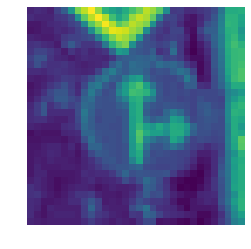

In [0]:
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = grayscale(resim)
plt.imshow(img)
plt.axis('off')
print(img.shape)

(-0.5, 31.5, 31.5, -0.5)

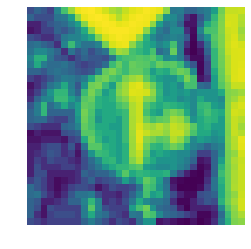

In [0]:
#contrast degerini artiriyor ve bu islem ozelliklerin daha iyi taninmasini sagliyor
def equalize(img):
  return cv2.equalizeHist(img)

img = equalize(img)
plt.imshow(img)
plt.axis('off')

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img / 255 #normalize img to 0-1
  return img

#Butun train resimlerini map fonksiyonuyla preprocessing fonksiyonuna sokuyor
#ve x_train array'ini guncelliyor
x_train = np.array(list(map(preprocessing, x_train)))
x_valid = np.array(list(map(preprocessing, x_valid)))
x_test  = np.array(list(map(preprocessing, x_test )))  

(-0.5, 31.5, 31.5, -0.5)

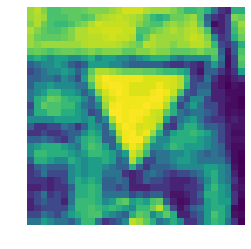

In [0]:
random_number = random.randint(0, len(x_train) - 1)
plt.imshow(x_train[random_number])
plt.axis('off')

In [0]:
x_train = x_train.reshape(34799, 32, 32, 1)
x_test  = x_test.reshape(12630, 32, 32, 1)
x_valid = x_valid.reshape(4410, 32, 32, 1)

In [0]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train, 43) #first_param = class_array, second_param = num_of_label
y_valid = to_categorical(y_valid, 43)
y_test  = to_categorical(y_test,  43)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Data Augmentation kısmı.
datagen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range  = 0.2,
                            shear_range = 0.1,   #random %10
                            rotation_range = 10) #random 0-10 arasinda
datagen.fit(x_train)                            

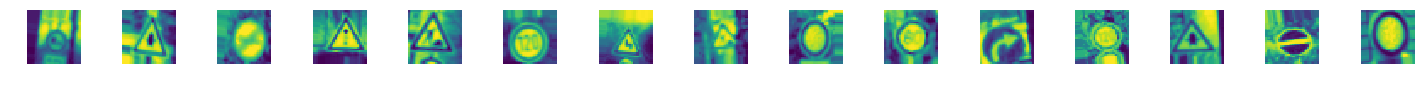

In [0]:
#flow is an iterable object
#batch size burada her datagen iterasyonunda kac resim uretilecegini belirtiyor
batches = datagen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(x_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [0]:
'''
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu')) #param = 30x5x5 + 30(bias values)
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu')) #param = 15x30x3x3
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu')) #less number has low accuracy, high number has more computing power
  model.add(Dropout(0.5)) #her update'de %50 node drop edilecek
  model.add(Dense(num_classes, activation='softmax'))

  #compiling
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
'''

def modified_model():
  model = Sequential()
  model.add(Conv2D(20, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(20, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(10, (3, 3), activation='relu'))
  model.add(Conv2D(10, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = modified_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 20)        10020     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        1810      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)              

In [0]:
#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size = 400, verbose=1, shuffle=1)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=50), steps_per_epoch=200, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
200/200 [==============================] - 34s 170ms/step - loss: 2.2933 - acc: 0.3592 - val_loss: 1.2565 - val_acc: 0.6016
Epoch 2/5
200/200 [==============================] - 34s 169ms/step - loss: 1.5712 - acc: 0.5282 - val_loss: 0.7657 - val_acc: 0.7823
Epoch 3/5
200/200 [==============================] - 34s 169ms/step - loss: 1.2399 - acc: 0.6146 - val_loss: 0.6264 - val_acc: 0.8138
Epoch 4/5
200/200 [==============================] - 34s 169ms/step - loss: 1.0163 - acc: 0.6879 - val_loss: 0.4374 - val_acc: 0.8789
Epoch 5/5
200/200 [==============================] - 34s 169ms/step - loss: 0.8849 - acc: 0.7286 - val_loss: 0.3690 - val_acc: 0.8819


In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history('val_loss'))
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

TypeError: ignored

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history('val_acc'))
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

TypeError: ignored